In [46]:
from shapely.geometry import Point
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
#import folium
#from folium.plugins import MarkerCluster
#from folium.plugins import FastMarkerCluster
import numpy as np
#import pgeocode as pg
import seaborn as sns
#import openppyxl

In [10]:
zipcodes = gpd.read_file('data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

NameError: name 'gpd' is not defined

In [ ]:
type(zipcodes)

In [ ]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [47]:
V_protocol = pd.read_csv('data/vaccine_with_protocol.csv')
print(V_protocol.shape)
V_protocol.head( )

(6694, 5)


,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [48]:
V_protocol.tail()

,vacc_date,zipcode,count_given,dose_nbr,protocol
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6690,2021-04-07,37228.0,2.0,2.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot
6692,2021-04-07,NaN,1.0,1.0,one-shot
6693,2021-04-07,NaN,7.0,2.0,two-shot


In [49]:
#checking if any thing is null
V_protocol.isnull().sum() 

vacc_date        0
zipcode        232
count_given      8
dose_nbr         8
protocol         0
dtype: int64

In [50]:
V_protocol.protocol.value_counts()

two-shot    5960
one-shot     734
Name: protocol, dtype: int64

In [51]:
V_protocol

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot
...,...,...,...,...,...
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6690,2021-04-07,37228.0,2.0,2.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot
6692,2021-04-07,NaN,1.0,1.0,one-shot


In [ ]:
#filling in 'NA' with 0
#V_protocol=V_protocol.fillna(0)
#changing zipcode, count, dose to integers
#V_protocol=V_protocol.astype({'zipcode':int,'count_given':int,'dose_nbr':int})
#V_protocol

In [52]:
C_count = pd.read_csv('data/COVID_CountByZipPerDate 03292021.csv')
print(C_count.shape)
C_count.head( )

(8832, 3)


,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [53]:
C_count.tail()

,Specimen Collection Date,Zip,Cases
8827,3/27/2021,37210.0,1
8828,3/27/2021,37211.0,1
8829,3/27/2021,37212.0,1
8830,3/27/2021,37214.0,2
8831,3/27/2021,37221.0,2


In [54]:
C_count.dtypes

Specimen Collection Date     object
Zip                         float64
Cases                         int64
dtype: object

In [55]:
#checking if any thing is null
C_count.isnull().sum() 

Specimen Collection Date      0
Zip                         376
Cases                         0
dtype: int64

In [56]:
#changing zip to int then to str
C_count.Zip = C_count.Zip.astype('Int64')
V_protocol.zipcode = V_protocol.zipcode.astype('Int64')


In [16]:
C_count.Zip = C_count.Zip.astype('str')
V_protocol.zipcode = V_protocol.zipcode.astype('str')


In [17]:
V_protocol.dtypes

vacc_date       object
zipcode         object
count_given    float64
dose_nbr       float64
protocol        object
dtype: object

In [18]:
C_count.dtypes

Specimen Collection Date    object
Zip                         object
Cases                        int64
dtype: object

In [19]:
#groupby zip
V_protocol_by_zip = V_protocol.groupby('zipcode')
C_count_by_zip = C_count.groupby('Zip')


In [20]:
V_protocol.describe()

,count_given,dose_nbr
count,6686.000000,6686.000000
mean,50.088244,1.406671
std,62.626506,0.491249
min,1.000000,1.000000
25%,7.000000,1.000000
50%,28.000000,1.000000
75%,69.000000,2.000000
max,622.000000,2.000000


In [21]:
C_count.describe()

,Cases
count,8832.000000
mean,10.599977
std,15.487583
min,1.000000
25%,2.000000
50%,5.000000
75%,13.000000
max,272.000000


In [22]:
#filling in 'NA' with 0
#C_count=C_count.fillna(0)
#changing zipcode to integers
#C_count=C_count.astype({'Zip':int})

#C_count

In [23]:
#FINDING DUPLICATE VALUES
duplicate_rows_df = V_protocol[V_protocol.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [24]:
duplicate_rows_df2 = C_count[C_count.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df2.shape)

number of duplicate rows:  (0, 3)


In [25]:
#FINDING NULL VALUES
print(V_protocol.isnull().sum())

vacc_date      0
zipcode        0
count_given    8
dose_nbr       8
protocol       0
dtype: int64


In [26]:
#finding distinct zipcodes
C_count.Zip.nunique()  #name is column name, can use .column or ['column name']

32

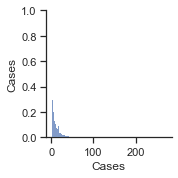

In [27]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(C_count);

In [28]:
#creat a geoframe out of V_protocol and C_count
#V_protocol['geometry'] = bus_stops.apply(lambda x: Point((float(x.lng), 
                                                        # float(x.lat))), 
                                        #axis=1)
#bus_stops.head(3)

In [29]:
#cases_by_zip=C_count.groupby('Zip')['Cases'].count()

In [30]:
C_count.Zip.value_counts()  #calculates how many rows of zipcode appears eg 37013 is 3 rows

37013    382
37211    379
<NA>     376
37209    364
37217    362
37115    361
37207    361
37076    357
37214    355
37203    344
37221    342
37206    340
37208    338
37072    338
37210    336
37205    330
37138    323
37218    321
37216    318
37215    317
37212    313
37204    306
37220    214
37189    211
37080    192
37228    168
37201    153
37219    140
37027    132
37213     43
37069     13
37238      3
Name: Zip, dtype: int64

In [31]:
#group by zipcode to get total cases per zipcode
df2 = C_count.groupby(['Zip'],as_index=False)['Cases'].sum()
df2

,Zip,Cases
0,37013,13354
1,37027,231
2,37069,16
3,37072,2984
4,37076,4279
5,37080,574
6,37115,4574
7,37138,2359
8,37189,479
9,37201,299


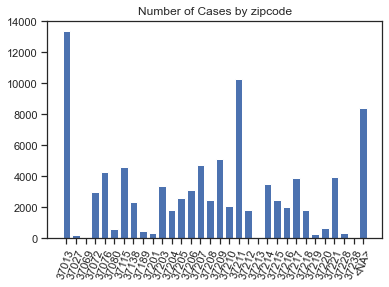

In [32]:
plt.bar('Zip', 'Cases', data = df2)
plt.xticks(rotation = 70)
#f, ax = plt.subplots(figsize=(18,5))
#plt.figure(figsize=(10, 6))
plt.title('Number of Cases by zipcode');

In [33]:
#V_protocol.loc[(V_protocol['dose_nbr'] == '2.0') | (V_protocol['protocol'] == 'two-shot'), 'complete'] = 'Fully'  
#V_protocol.loc[(V_protocol['dose_nbr'] == '1.0') | (V_protocol['protocol'] == 'two-shot'), 'complete'] = 'Half' 
#V_protocol.loc[(V_protocol['dose_nbr'] == '1.0') | (V_protocol['protocol'] == 'one-shot'), 'complete'] = 'Fully'
#print(V_protocol.tail(50))

# create a list of our conditions
conditions = [
    
    (V_protocol['dose_nbr'] == 2.0) & (V_protocol['protocol'] == 'two-shot'),
    (V_protocol['dose_nbr'] == 1.0) & (V_protocol['protocol'] == 'two-shot'),
    (V_protocol['dose_nbr'] == 1.0) & (V_protocol['protocol'] == 'one-shot')
    ]

# create a list of the values we want to assign for each condition
values = ['Full', 'Half', 'Full']

# create a new column and use np.select to assign values to it using our lists as arguments
V_protocol['Complete'] = np.select(conditions, values)

V_protocol.tail(50)




,vacc_date,zipcode,count_given,dose_nbr,protocol,Complete
6644,2021-04-07,37206,42.0,1.0,two-shot,Half
6645,2021-04-07,37206,4.0,1.0,one-shot,Full
6646,2021-04-07,37206,44.0,2.0,two-shot,Full
6647,2021-04-07,37207,41.0,1.0,two-shot,Half
6648,2021-04-07,37207,5.0,1.0,one-shot,Full
6649,2021-04-07,37207,38.0,2.0,two-shot,Full
6650,2021-04-07,37208,29.0,1.0,two-shot,Half
6651,2021-04-07,37208,1.0,1.0,one-shot,Full
6652,2021-04-07,37208,16.0,2.0,two-shot,Full
6653,2021-04-07,37209,98.0,1.0,two-shot,Half


In [34]:
#group by zipcode
df3 = V_protocol.groupby(['zipcode'],as_index=False)['Complete'].count()
df3

,zipcode,Complete
0,37013,235
1,37027,124
2,37069,60
3,37072,239
4,37076,237
5,37080,217
6,37115,238
7,37138,234
8,37189,215
9,37201,183


In [43]:
Vaccine_df = V_protocol.groupby(['zipcode', 'Complete']).size().reset_index(name="Count")
Vaccine_df

,zipcode,Complete,Count
0,37013,Full,124
1,37013,Half,111
2,37027,Full,51
3,37027,Half,73
4,37069,0,2
...,...,...,...
61,37228,Half,99
62,37238,Full,2
63,37238,Half,3
64,<NA>,Full,122


In [36]:
TN_pop_df = pd.read_csv('data/TN_pop.csv')
print(TN_pop_df)
TN_pop_df.head( )

     #  Zip Code               Location                  City  Population  \
0    1     37212  36.133973, -86.801471  Nashville, Tennessee       18547   
1    2     37201  36.165550, -86.777679  Nashville, Tennessee        1167   
2    3     37206  36.180771, -86.730153  Nashville, Tennessee       27751   
3    4     37208  36.178567, -86.805263  Nashville, Tennessee       15272   
4    5     37219  36.166457, -86.782946  Nashville, Tennessee         830   
5    6     37211  36.066734, -86.722609  Nashville, Tennessee       64753   
6    7     37203  36.149926, -86.789227  Nashville, Tennessee       12781   
7    8     37216  36.216583, -86.726843  Nashville, Tennessee       19132   
8    9     37210  36.149265, -86.732957  Nashville, Tennessee       16170   
9   10     37207  36.238944, -86.779883  Nashville, Tennessee       35744   
10  11     37204  36.106277, -86.773949  Nashville, Tennessee       11024   
11  12     37217  36.113155, -86.667020  Nashville, Tennessee       28293   

,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank
0,1,37212,"36.133973, -86.801471","Nashville, Tennessee",18547,6556.46,"#1,154"
1,2,37201,"36.165550, -86.777679","Nashville, Tennessee",1167,3602.97,"#2,655"
2,3,37206,"36.180771, -86.730153","Nashville, Tennessee",27751,3597.99,"#2,660"
3,4,37208,"36.178567, -86.805263","Nashville, Tennessee",15272,3416.62,"#2,807"
4,5,37219,"36.166457, -86.782946","Nashville, Tennessee",830,3259.85,"#2,964"


In [57]:
TN_pop_df1=TN_pop_df

In [38]:
TN_pop_df1=TN_pop_df[['Zip Code', 'Location','Population']]
print(TN_pop_df1)

# Select the columns you want
#df1 = df[['a','d']]


    Zip Code               Location  Population
0      37212  36.133973, -86.801471       18547
1      37201  36.165550, -86.777679        1167
2      37206  36.180771, -86.730153       27751
3      37208  36.178567, -86.805263       15272
4      37219  36.166457, -86.782946         830
5      37211  36.066734, -86.722609       64753
6      37203  36.149926, -86.789227       12781
7      37216  36.216583, -86.726843       19132
8      37210  36.149265, -86.732957       16170
9      37207  36.238944, -86.779883       35744
10     37204  36.106277, -86.773949       11024
11     37217  36.113155, -86.667020       28293
12     37205  36.103877, -86.869505       21861
13     37215  36.080535, -86.833278       22112
14     37214  36.197795, -86.673345       26474
15     37209  36.150239, -86.966459       35081
16     37220  36.068452, -86.793116        6163
17     37221  36.063625, -86.977097       34809
18     37218  36.209917, -86.889939       15079
19     37228  36.196291, -86.803583     

In [39]:
#print("\nSplitting 'Location' column into two different columns :\n",
                                 # TN_pop_df1.Location.str.split(expand=True))

TN_pop_df1[['Lat','Lon']] = TN_pop_df1.Location.str.split(expand=True)
   
print("\n After adding two new columns : \n", TN_pop_df1)


 After adding two new columns : 
     Zip Code               Location  Population         Lat         Lon
0      37212  36.133973, -86.801471       18547  36.133973,  -86.801471
1      37201  36.165550, -86.777679        1167  36.165550,  -86.777679
2      37206  36.180771, -86.730153       27751  36.180771,  -86.730153
3      37208  36.178567, -86.805263       15272  36.178567,  -86.805263
4      37219  36.166457, -86.782946         830  36.166457,  -86.782946
5      37211  36.066734, -86.722609       64753  36.066734,  -86.722609
6      37203  36.149926, -86.789227       12781  36.149926,  -86.789227
7      37216  36.216583, -86.726843       19132  36.216583,  -86.726843
8      37210  36.149265, -86.732957       16170  36.149265,  -86.732957
9      37207  36.238944, -86.779883       35744  36.238944,  -86.779883
10     37204  36.106277, -86.773949       11024  36.106277,  -86.773949
11     37217  36.113155, -86.667020       28293  36.113155,  -86.667020
12     37205  36.103877, -86.

C:\Users\dhoza\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
TN_pop_df1 = TN_pop_df1.replace(',','', regex=True)
TN_pop_df1

,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank
0,1,37212,36.133973 -86.801471,Nashville Tennessee,18547,6556.46,#1154
1,2,37201,36.165550 -86.777679,Nashville Tennessee,1167,3602.97,#2655
2,3,37206,36.180771 -86.730153,Nashville Tennessee,27751,3597.99,#2660
3,4,37208,36.178567 -86.805263,Nashville Tennessee,15272,3416.62,#2807
4,5,37219,36.166457 -86.782946,Nashville Tennessee,830,3259.85,#2964
5,6,37211,36.066734 -86.722609,Nashville Tennessee,64753,3030.86,#3168
6,7,37203,36.149926 -86.789227,Nashville Tennessee,12781,3025.69,#3172
7,8,37216,36.216583 -86.726843,Nashville Tennessee,19132,2791.23,#3443
8,9,37210,36.149265 -86.732957,Nashville Tennessee,16170,1747.70,#4837
9,10,37207,36.238944 -86.779883,Nashville Tennessee,35744,1712.06,#4897


In [41]:
#dropping location column
TN_pop_df2=TN_pop_df1[['Zip Code', 'Lat','Lon']]
print(TN_pop_df2)

    Zip Code        Lat         Lon
0      37212  36.133973  -86.801471
1      37201  36.165550  -86.777679
2      37206  36.180771  -86.730153
3      37208  36.178567  -86.805263
4      37219  36.166457  -86.782946
5      37211  36.066734  -86.722609
6      37203  36.149926  -86.789227
7      37216  36.216583  -86.726843
8      37210  36.149265  -86.732957
9      37207  36.238944  -86.779883
10     37204  36.106277  -86.773949
11     37217  36.113155  -86.667020
12     37205  36.103877  -86.869505
13     37215  36.080535  -86.833278
14     37214  36.197795  -86.673345
15     37209  36.150239  -86.966459
16     37220  36.068452  -86.793116
17     37221  36.063625  -86.977097
18     37218  36.209917  -86.889939
19     37228  36.196291  -86.803583
20     37213  36.166795  -86.766631


In [42]:
TN_pop_df2['geometry'] = TN_pop_df2.apply(lambda x: Point((float(x.Lon), 
                                                         float(x.Lat))),  #they are already floats can take out
                                        axis=1)
TN_pop_df2.head(3)

<ipython-input-42-4e410c5fac53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TN_pop_df2['geometry'] = TN_pop_df2.apply(lambda x: Point((float(x.Lon),


,Zip Code,Lat,Lon,geometry
0,37212,36.133973,-86.801471,POINT (-86.80147100000001 36.133973)
1,37201,36.165550,-86.777679,POINT (-86.77767900000001 36.16555)
2,37206,36.180771,-86.730153,POINT (-86.730153 36.180771)


In [ ]:
Vaccine_pop_df=Vaccne_df.merge